In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df.head(12)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.833807,0.993853,0.982360,0.970390,0.957780,0.943590,0.927453,0.909437,...,0.912933,0.925787,0.928783,0.932267,0.935180,0.938783,0.942367,0.946693,0.955560,1.0
1,"""best""",nn,0.834000,0.993333,0.979667,0.966000,0.953333,0.939667,0.925000,0.906000,...,0.920333,0.933333,0.937667,0.943333,0.946000,0.949667,0.953667,0.960000,0.968333,1.0
2,"""second""",nn,0.832000,0.993333,0.980667,0.967667,0.953000,0.938000,0.921667,0.903333,...,0.920000,0.932333,0.936333,0.941333,0.944333,0.948000,0.952333,0.957667,0.966000,1.0
3,"""third""",nn,0.831333,0.993667,0.981000,0.966667,0.952667,0.937333,0.920667,0.902000,...,0.921667,0.934333,0.938333,0.943333,0.946667,0.949667,0.954667,0.959667,0.967000,1.0
0,"""real_third""",xgboost,0.835247,0.997267,0.990680,0.984697,0.978347,0.971227,0.963530,0.954813,...,0.882677,0.890210,0.892107,0.895220,0.896810,0.899593,0.903207,0.907913,0.915277,1.0
1,"""best""",xgboost,0.834667,0.996667,0.990333,0.984000,0.977000,0.970333,0.962333,0.953000,...,0.885000,0.893667,0.896000,0.899333,0.901667,0.904000,0.907333,0.912333,0.920667,1.0
2,"""second""",xgboost,0.833667,0.997000,0.990667,0.984000,0.976333,0.968667,0.960333,0.951000,...,0.886667,0.895333,0.898000,0.901667,0.904333,0.907333,0.910333,0.915667,0.922333,1.0
3,"""third""",xgboost,0.834667,0.997000,0.990667,0.984000,0.976667,0.969333,0.960333,0.950333,...,0.885667,0.894000,0.896667,0.899333,0.902000,0.905000,0.908333,0.913333,0.920667,1.0
0,"""real_third""",linear,0.833993,0.985000,0.971830,0.958843,0.946210,0.933227,0.918317,0.898590,...,0.939893,0.954217,0.957413,0.963120,0.966497,0.970320,0.974443,0.979887,0.987603,1.0
1,"""best""",linear,0.831000,0.984000,0.972000,0.959333,0.945667,0.931000,0.914000,0.895000,...,0.945000,0.958000,0.962667,0.967333,0.969667,0.973000,0.977333,0.980000,0.987000,1.0


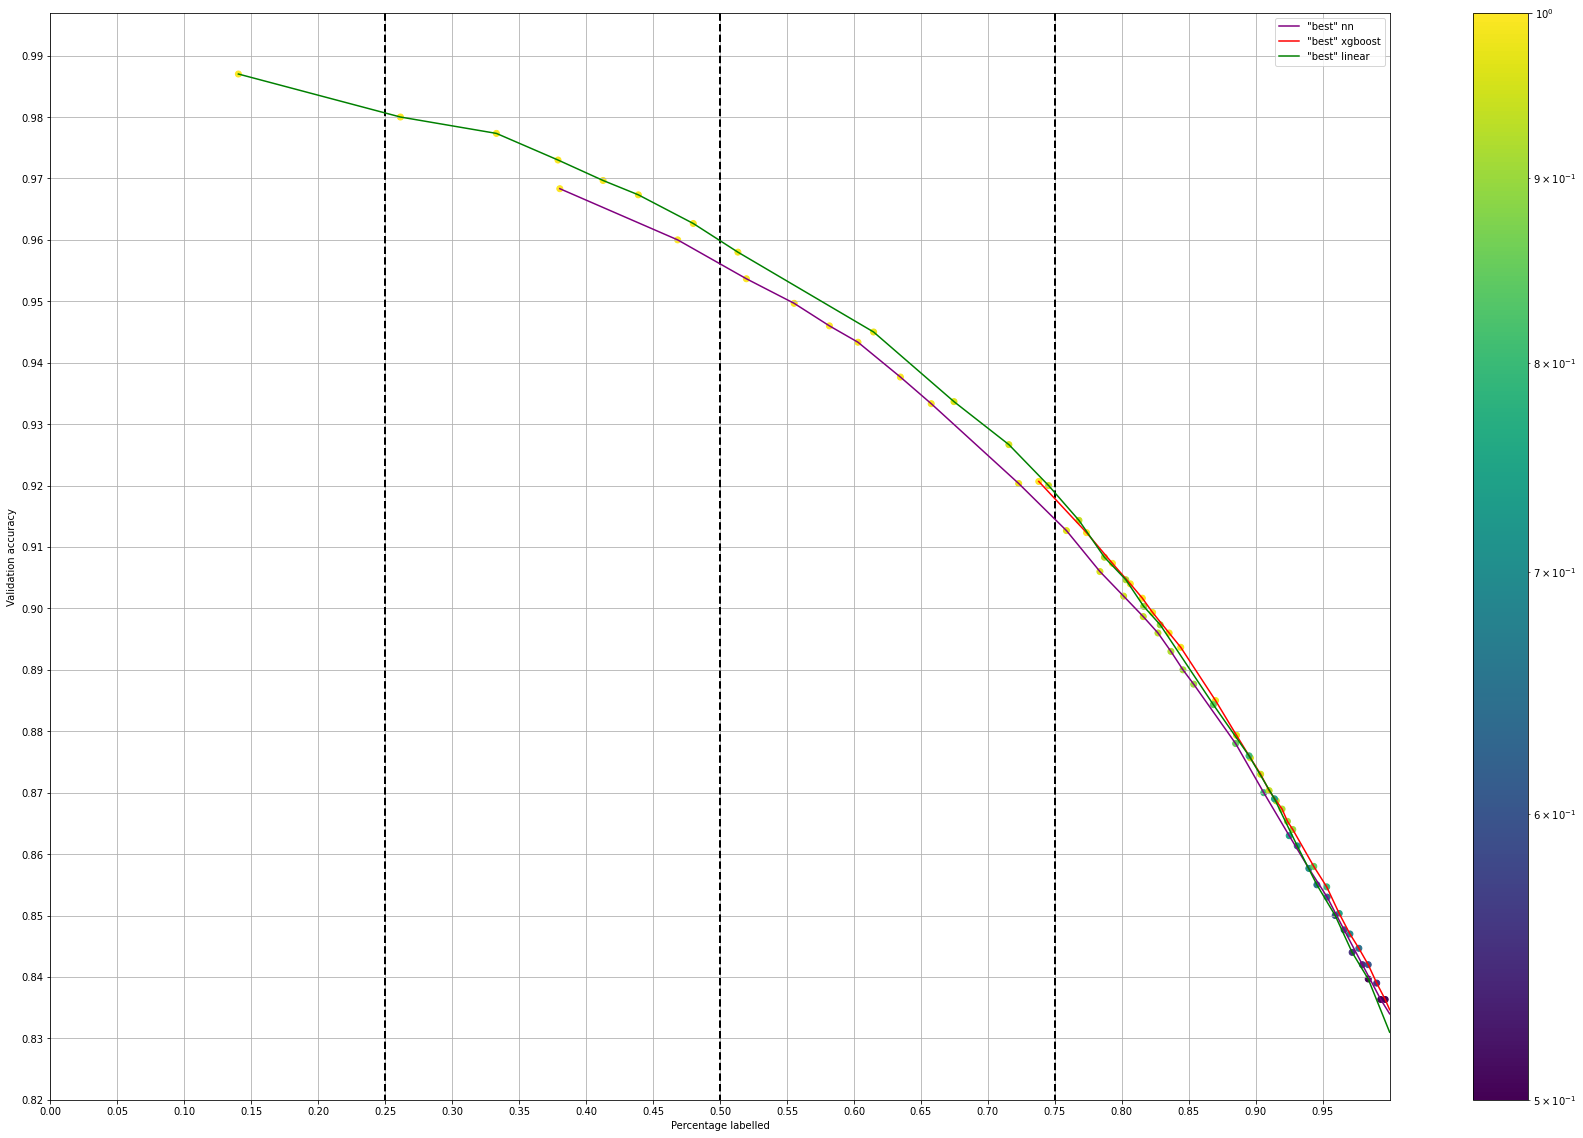

In [5]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] # best minimal bestes # mit abstand am schlechtesten
#df = df[df.combi_model=="xgboost"] # second minimal bestes besonders später
#df = df[df.combi_model=="linear"] # second minimal bestes

df = df[df['Name'] == '"best"'] # laut optimization bestes modell
#df = df[df['Name'] == '"second"']
df = df[df['Name'] != '"third"'] # fliegt raus weil nicht in top 3
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

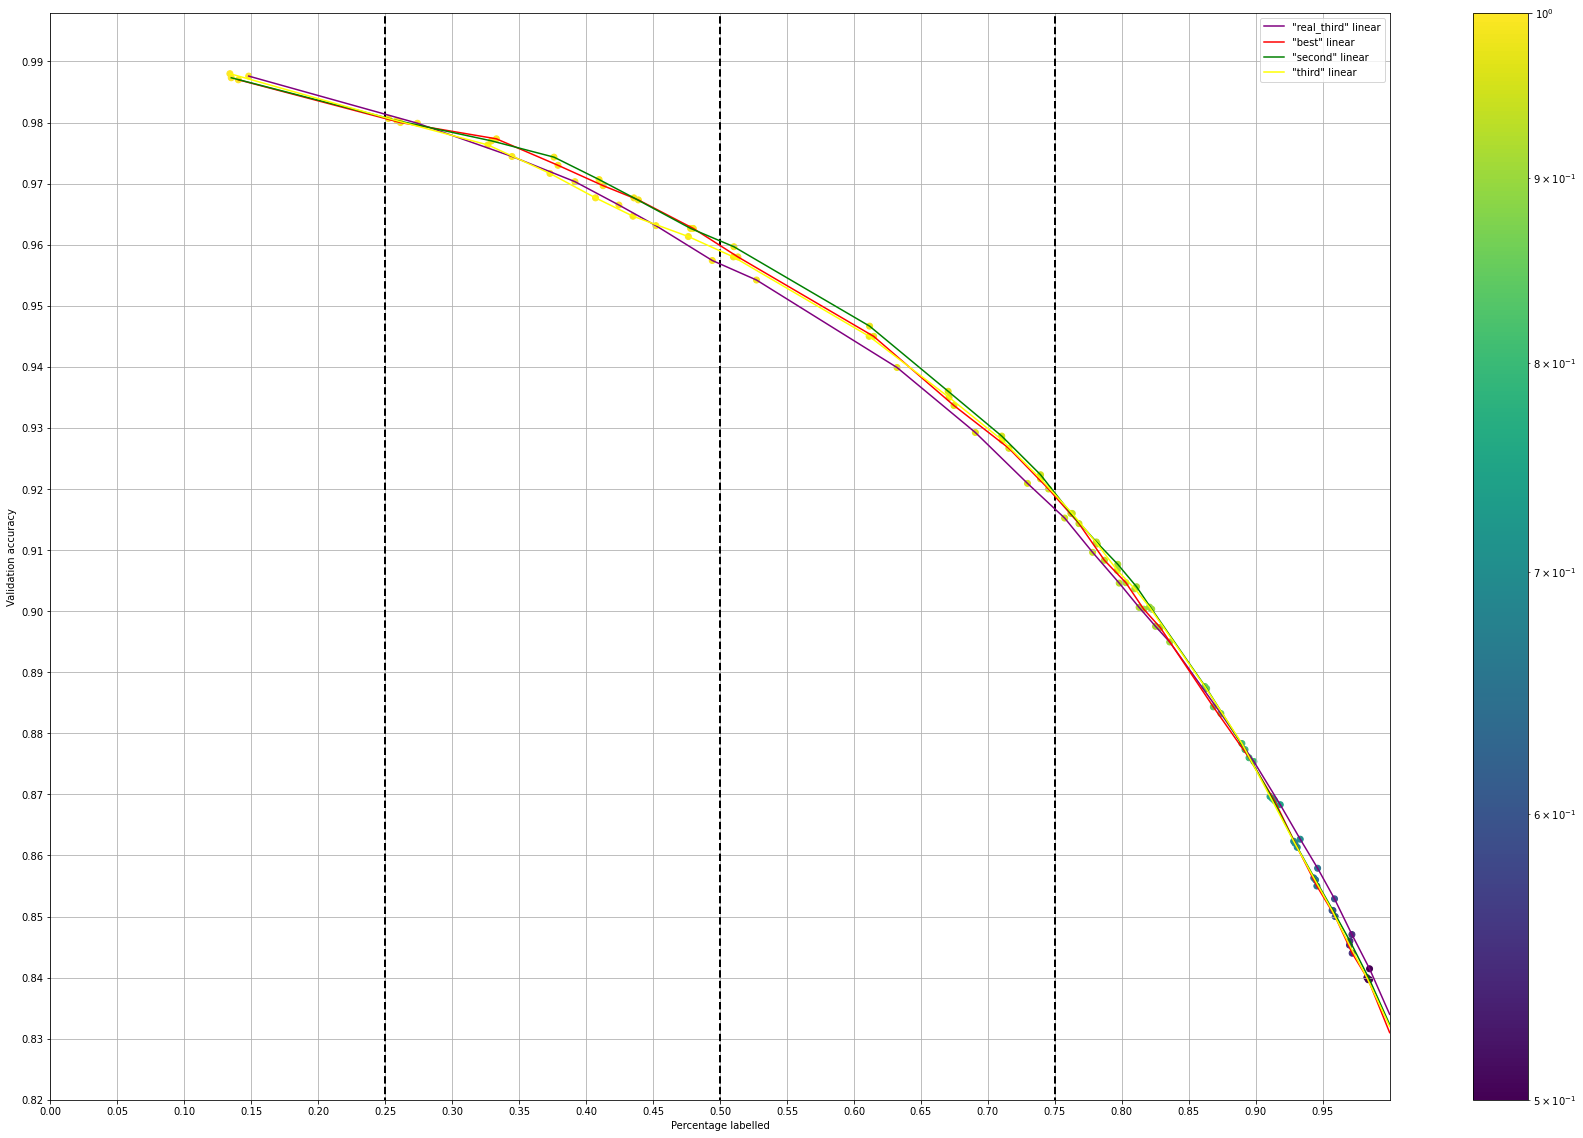

In [6]:
df1 = pd.read_csv("./oesch8_ohne/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_ohne/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_ohne/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']




#f"confidence average @{i}.percentage labelled @{i}:" 
#display(df["confidence average @0.5.percentage labelled @0.5: "])
names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01))
plt.grid()
plt.yticks(np.arange(np.round(np.min(accuracies)-0.01, decimals = 2), np.max(accuracies)+0.01, step=0.01))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()